# Now a project

## The problem statement


In this project, I try to answer the question that whether or not it will rain tomorrow in Australia. I implement Logistic Regression with Python and Scikit-Learn. 


To answer the question, I build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression. I have used the **Rain in Australia** dataset downloaded from the Kaggle website for this project.

## Dataset description


I have used the **Rain in Australia** data set downloaded from the Kaggle website.


I have downloaded this data set from the [Kaggle website](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). The data set can be found at the following url:-


This dataset contains daily weather observations from numerous Australian weather stations. 

In [1]:
import pandas as pd
import numpy as np
import dprocessing as dp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.shape

(145460, 23)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Types of variables


There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

In [7]:
# find categorical variables

categorical = [c for c in df.columns if df[c].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :')

for i, c in enumerate(categorical):
    print('{:2} → {}'.format(i + 1, c))

There are 7 categorical variables

The categorical variables are :
 1 → Date
 2 → Location
 3 → WindGustDir
 4 → WindDir9am
 5 → WindDir3pm
 6 → RainToday
 7 → RainTomorrow


In [8]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Summary of categorical variables


- There is a date variable. It is denoted by `Date` column.


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [9]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
# print categorical variables containing missing values
cat_nulls = [c for c in categorical if df[c].isnull().sum() != 0]

df[cat_nulls].isnull().sum()

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [11]:
# check for cardinality in categorical variables
msn = '{:15} contains → {:5} labels'
for c in categorical:
    print(msn.format(c, len(df[c].unique())))

Date            contains →  3436 labels
Location        contains →    49 labels
WindGustDir     contains →    17 labels
WindDir9am      contains →    17 labels
WindDir3pm      contains →    17 labels
RainToday       contains →     3 labels
RainTomorrow    contains →     3 labels


### Feature Engineering of Date Variable

In [12]:
df['Date'].dtypes

dtype('O')

In [13]:
#dates into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [15]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [16]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [17]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [18]:
# again view the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [19]:
# drop the original Date variable
df.drop('Date', axis=1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Explore Categorical Variables


Now, I will explore the categorical variables one by one. 

In [20]:
# find categorical variables
categorical = [c for c in df.columns if df[c].dtype == 'O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :')

for i, c in enumerate(categorical):
    print('{:2} → {}'.format(i + 1, c))

There are 6 categorical variables

The categorical variables are :
 1 → Location
 2 → WindGustDir
 3 → WindDir9am
 4 → WindDir3pm
 5 → RainToday
 6 → RainTomorrow


In [21]:
# check for missing values in categorical variables 
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

We can see that `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variables contain missing values. I will explore these variables one by one.

### Explore `Location` variable

In [22]:
# print number of labels in Location variable
print(msn.format('Location', len(df['Location'].unique())))

Location        contains →    49 labels


In [23]:
# check labels in location variable
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [24]:
# check frequency distribution of values in Location variable
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Perth               3193
Hobart              3193
Brisbane            3193
Darwin              3193
Adelaide            3193
Melbourne           3193
MountGambier        3040
Albany              3040
Cairns              3040
GoldCoast           3040
Ballarat            3040
AliceSprings        3040
Townsville          3040
Bendigo             3040
Wollongong          3040
Albury              3040
MountGinini         3040
Launceston          3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Woomera             3009
Richmond            3009
Portland            3009
Williamtown         3009
BadgerysCreek       3009
Witchcliffe         3009
Dartmoor            3009
SydneyAirport       3009
CoffsHarbour        3009
Moree               3009
NorfolkIsland       3009
WaggaWagga          3009
Nuriootpa           3009
MelbourneAirport    3009
Cobar               3009
PerthAirport        3009
Mildura             3009


<AxesSubplot:>

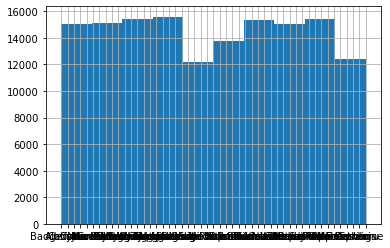

In [25]:
df['Location'].hist();

In [26]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first = True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore `WindGustDir` variable

In [27]:
# print number of labels in WindGustDir variable
print(msn.format('WindGustDir', len(df['WindGustDir'].unique())))

WindGustDir     contains →    17 labels


In [28]:
# check labels in WindGustDir variable
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [29]:
# check frequency distribution of values in WindGustDir variable
df['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

<AxesSubplot:>

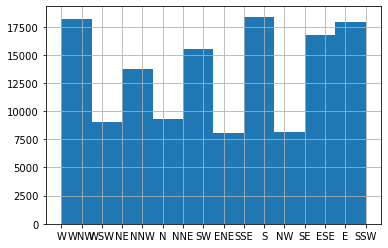

In [30]:
df['WindGustDir'].hist()

In [31]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['WindGustDir'], drop_first = True, dummy_na = True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first = True, dummy_na = True).sum()

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

### Explore `WindDir9am` variable

In [33]:
# print number of labels in WindDir9am variable
print(msn.format('WindDir9am', len(df['WindDir9am'].unique())))

WindDir9am      contains →    17 labels


In [34]:
# check labels in WindDir9am variable
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [35]:
# check frequency distribution of values in WindDir9am variable
df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

<AxesSubplot:>

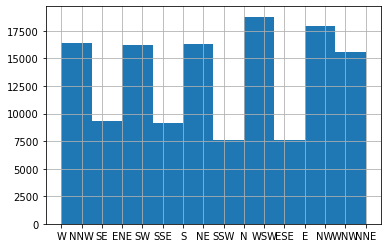

In [36]:
df['WindDir9am'].hist()

In [37]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['WindDir9am'], drop_first = True, dummy_na = True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['WindDir9am'], drop_first = True, dummy_na = True).sum()

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

We can see that there are 10566 missing values in the `WindDir9am` variable.

### Explore `WindDir3pm` variable

In [39]:
# print number of labels in WindDir3pm variable
print(msn.format('WindDir3pm', len(df['WindDir3pm'].unique())))

WindDir3pm      contains →    17 labels


In [40]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [41]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

<AxesSubplot:>

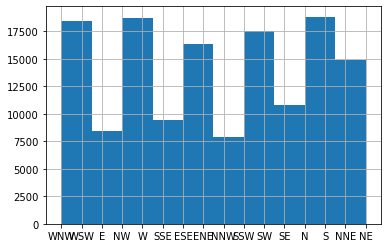

In [42]:
df['WindDir3pm'].hist()

In [43]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['WindDir3pm'], drop_first = True, dummy_na = True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [44]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['WindDir3pm'], drop_first = True, dummy_na = True).sum()

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

There are 4228 missing values in the `WindDir3pm` variable.

### Explore `RainToday` variable

In [45]:
# print number of labels in RainToday variable
print(msn.format('RainToday', len(df['RainToday'].unique())))

RainToday       contains →     3 labels


In [46]:
# check labels in WindGustDir variable
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [47]:
# check frequency distribution of values in WindGustDir variable

df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [48]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['RainToday'], drop_first = True, dummy_na = True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [49]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['RainToday'], drop_first = True, dummy_na = True).sum()

Yes    31880
NaN     3261
dtype: int64

There are 3261 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [50]:
# find numerical variables

numerical = [c for c in df.columns if df[c].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The categorical variables are :')

for i, n in enumerate(numerical):
    print('{:2} → {}'.format(i + 1, n))

There are 19 numerical variables

The categorical variables are :
 1 → MinTemp
 2 → MaxTemp
 3 → Rainfall
 4 → Evaporation
 5 → Sunshine
 6 → WindGustSpeed
 7 → WindSpeed9am
 8 → WindSpeed3pm
 9 → Humidity9am
10 → Humidity3pm
11 → Pressure9am
12 → Pressure3pm
13 → Cloud9am
14 → Cloud3pm
15 → Temp9am
16 → Temp3pm
17 → Year
18 → Month
19 → Day


In [51]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Summary of numerical variables


- There are 16 numerical variables. 


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.




## Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [52]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

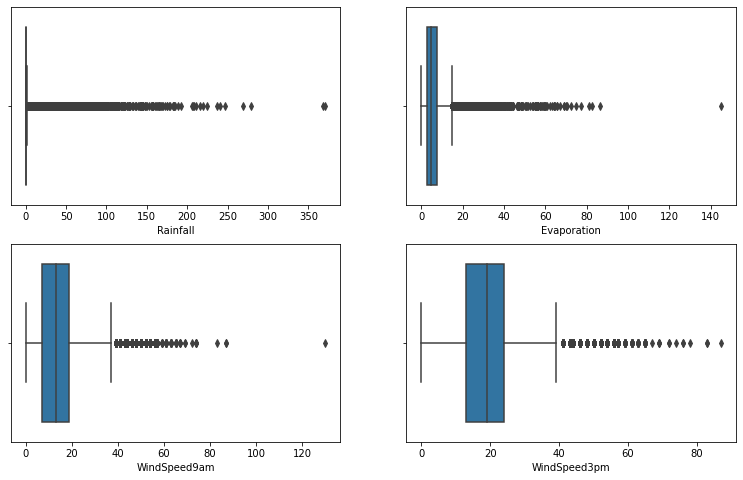

In [53]:
# draw boxplots to visualize outliers
fig, ax = plt.subplots(2, 2, figsize = (13, 8))


sns.boxplot(data = df, x = 'Rainfall', ax = ax[0, 0])
sns.boxplot(data = df, x = 'Evaporation', ax = ax[0, 1])
sns.boxplot(data = df, x = 'WindSpeed9am', ax = ax[1, 0])
sns.boxplot(data = df, x = 'WindSpeed3pm', ax = ax[1, 1]);

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or not. If the variable follows normal distribution, then I will do `zscore` otherwise if they are skewed, I will find IQR (Interquantile range).

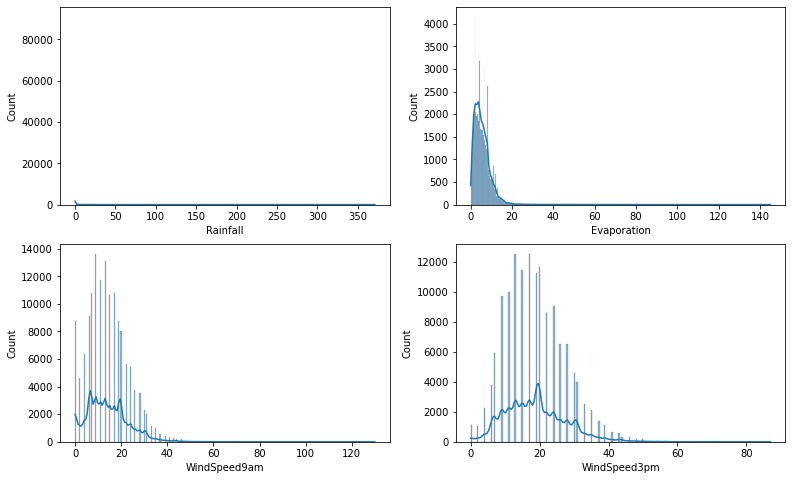

In [54]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))


sns.histplot(data = df, x = 'Rainfall', ax = ax[0, 0], kde = True)
sns.histplot(data = df, x = 'Evaporation', ax = ax[0, 1], kde = True)
sns.histplot(data = df, x = 'WindSpeed9am', ax = ax[1, 0], kde = True)
sns.histplot(data = df, x = 'WindSpeed3pm', ax = ax[1, 1], kde = True);

In [55]:
outliers = dp.Outliers()

In [56]:
outliers.fit(df[numerical], verbose = True); 

54 outliers were found
489 outliers were found
25578 outliers were found
1995 outliers were found
0 outliers were found
3092 outliers were found
1817 outliers were found
2523 outliers were found
1425 outliers were found
0 outliers were found
1191 outliers were found
919 outliers were found
0 outliers were found
0 outliers were found
262 outliers were found
764 outliers were found
0 outliers were found
0 outliers were found
0 outliers were found


In [57]:
numerical[2]

'Rainfall'

In [58]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


## Declare feature vector and target variable

In [59]:
df.dropna(subset = ['RainTomorrow'], inplace = True)

In [60]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [61]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [62]:
X.shape

(142193, 24)

## Split data into separate training and test set

In [63]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [65]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [66]:
# display categorical variables
categorical = [c for c in X_train.columns if X_train[c].dtype == 'O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :')

for i, c in enumerate(categorical):
    print('{:2} → {}'.format(i + 1, c))

There are 5 categorical variables

The categorical variables are :
 1 → Location
 2 → WindGustDir
 3 → WindDir9am
 4 → WindDir3pm
 5 → RainToday


In [67]:
# display numerical variables
numerical = [c for c in X_train.columns if X_train[c].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The categorical variables are :')

for i, n in enumerate(numerical):
    print('{:2} → {}'.format(i + 1, n))

There are 19 numerical variables

The categorical variables are :
 1 → MinTemp
 2 → MaxTemp
 3 → Rainfall
 4 → Evaporation
 5 → Sunshine
 6 → WindGustSpeed
 7 → WindSpeed9am
 8 → WindSpeed3pm
 9 → Humidity9am
10 → Humidity3pm
11 → Pressure9am
12 → Pressure3pm
13 → Cloud9am
14 → Cloud3pm
15 → Temp9am
16 → Temp3pm
17 → Year
18 → Month
19 → Day


### Engineering missing values in numerical variables

In [68]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [69]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [70]:
# print percentage of missing values in the numerical variables in training set
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print('{:20} → {}'.format(col, round(X_train[col].isnull().mean(),4)))

MinTemp              → 0.0044
MaxTemp              → 0.0023
Rainfall             → 0.01
Evaporation          → 0.4283
Sunshine             → 0.4775
WindGustSpeed        → 0.0648
WindSpeed9am         → 0.0095
WindSpeed3pm         → 0.0184
Humidity9am          → 0.0127
Humidity3pm          → 0.0254
Pressure9am          → 0.0986
Pressure3pm          → 0.0983
Cloud9am             → 0.3792
Cloud3pm             → 0.4023
Temp9am              → 0.0065
Temp3pm              → 0.0191


### Assumption


When there are outliers in the dataset, we should use median imputation because median imputation is robust to outliers.


The imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [72]:
# impute missing values in X_train and X_test with respective column median in X_train
for d in [X_train, X_test]:
    for col in numerical:
        col_median = X_train.loc[:, col].median() #only use the training set
        d.loc[:, col].fillna(col_median, inplace = True)   

In [73]:
# check again missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [74]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

In [75]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [76]:
# print categorical variables with missing data      
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print('{:20} → {}'.format(col, round(X_train[col].isnull().mean(),4)))

WindGustDir          → 0.0651
WindDir9am           → 0.0701
WindDir3pm           → 0.0264
RainToday            → 0.01


In [77]:
# impute missing categorical variables with most frequent value

for d in [X_train, X_test]:
    d['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace = True)
    d['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace = True)
    d['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace = True)
    d['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace = True)

In [78]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [79]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [80]:
# check missing values in X_train
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [81]:
# check missing values in X_test
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [82]:
for d in [X_train, X_test]:
    outliers = dp.Outliers()
    d.loc[:, numerical] = outliers.fit(d.loc[:, numerical], how = 'iqr', verbose = True, impute = 'extremes')[0]

50 outliers were found
396 outliers were found
22835 outliers were found
25940 outliers were found
48677 outliers were found
4249 outliers were found
1367 outliers were found
1922 outliers were found
1138 outliers were found
0 outliers were found
2142 outliers were found
1841 outliers were found
0 outliers were found
3951 outliers were found
228 outliers were found
658 outliers were found
0 outliers were found
0 outliers were found
0 outliers were found


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


12 outliers were found
106 outliers were found
5710 outliers were found
6377 outliers were found
12146 outliers were found
1137 outliers were found
372 outliers were found
536 outliers were found
281 outliers were found
0 outliers were found
566 outliers were found
453 outliers were found
0 outliers were found
1006 outliers were found
56 outliers were found
168 outliers were found
0 outliers were found
0 outliers were found
0 outliers were found


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


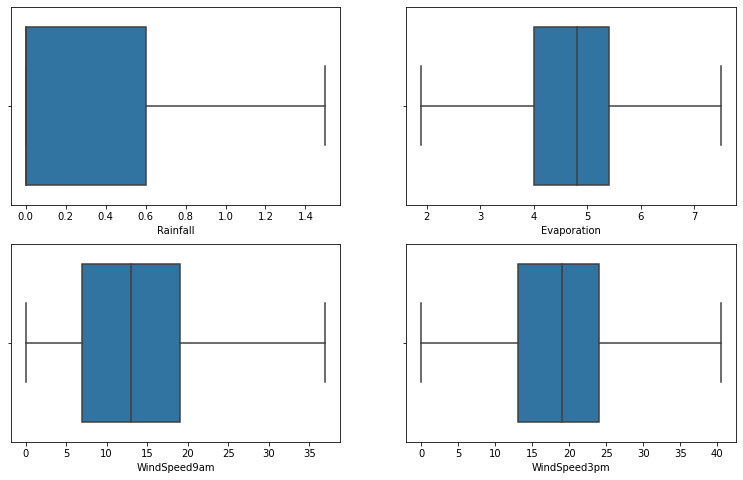

In [83]:
# draw boxplots to visualize outliers
fig, ax = plt.subplots(2, 2, figsize = (13, 8))


sns.boxplot(data = X_train, x = 'Rainfall', ax = ax[0, 0])
sns.boxplot(data = X_train, x = 'Evaporation', ax = ax[0, 1])
sns.boxplot(data = X_train, x = 'WindSpeed9am', ax = ax[1, 0])
sns.boxplot(data = X_train, x = 'WindSpeed3pm', ax = ax[1, 1]);

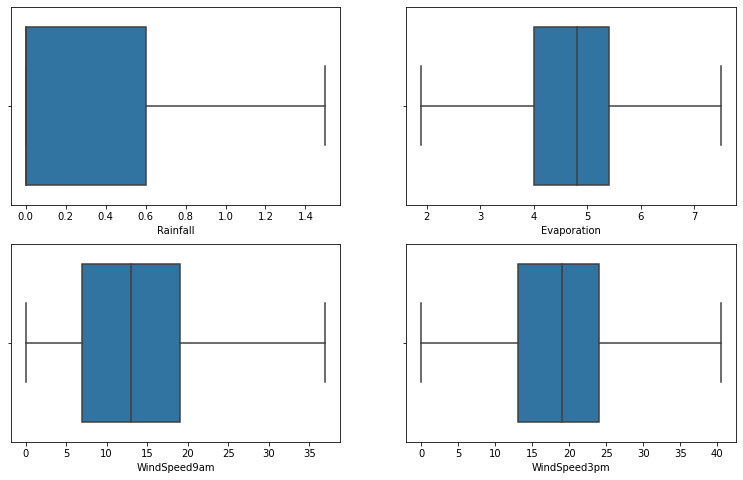

In [84]:
# draw boxplots to visualize outliers
fig, ax = plt.subplots(2, 2, figsize = (13, 8))


sns.boxplot(data = X_test, x = 'Rainfall', ax = ax[0, 0])
sns.boxplot(data = X_test, x = 'Evaporation', ax = ax[0, 1])
sns.boxplot(data = X_test, x = 'WindSpeed9am', ax = ax[1, 0])
sns.boxplot(data = X_test, x = 'WindSpeed3pm', ax = ax[1, 1]);

### Encode categorical variables

In [85]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [86]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
113462,Witchcliffe,S,SSE,S,No
89638,Cairns,ENE,SSE,SE,Yes
138130,AliceSprings,E,NE,N,No
87898,Cairns,ESE,SSE,E,No
16484,Newcastle,W,N,SE,No


In [88]:
ohe = []

for c in categorical:
        ohe.append(pd.get_dummies(X_train.loc[:, c], drop_first = True))
        
ohe;

In [93]:
[1, *[2, 3, 4, 5]]

[1, 2, 3, 4, 5]

In [91]:
print(1, 2, 3, 4)

1 2 3 4


In [94]:
X_train = pd.concat([X_train[numerical], *ohe], axis = 1)

In [95]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
113462,13.9,22.6,0.2,4.8,8.50,41.0,20.0,28.0,65.0,55.0,...,0,1,0,0,0,0,0,0,0,0
89638,22.4,29.4,1.5,6.0,7.45,33.0,7.0,19.0,71.0,59.0,...,0,0,1,0,0,0,0,0,0,1
138130,9.7,36.2,0.0,7.5,9.45,31.0,15.0,11.0,18.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,7.5,9.45,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.50,39.0,0.0,7.0,72.0,53.0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
ohe = []

for c in categorical:
        ohe.append(pd.get_dummies(X_test[c], drop_first = True))

In [97]:
X_test = pd.concat([X_test[numerical], *ohe], axis = 1)

In [98]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
88578,17.4,29.0,0.0,3.6,9.45,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
59016,6.8,14.4,0.8,1.9,8.50,46.0,17.0,22.0,80.0,55.0,...,0,1,0,0,0,0,0,0,0,0
127049,10.1,15.4,1.5,4.8,8.50,31.0,13.0,9.0,70.0,61.0,...,0,0,0,1,0,0,0,0,0,1
120886,14.4,33.4,0.0,7.5,9.45,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,1,0,0,0,0
136649,6.8,14.3,1.5,1.9,7.45,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,1


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

## 11. Feature Scaling

In [99]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193686,23.240083,0.385150,4.796787,8.472225,39.569628,13.894413,18.534469,68.920416,51.509547,...,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483,0.221012
std,6.387270,7.075613,0.610106,1.630563,0.678592,12.184068,8.534160,8.438286,18.781661,20.530723,...,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378,0.414930
min,-6.200000,2.700000,0.000000,1.900000,7.450000,8.500000,0.000000,0.000000,18.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.600000,43.500000,1.500000,7.500000,9.450000,68.500000,37.000000,40.500000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Max-Min Scaling

- How to scale your data to any arbitrary range (typically $[0, 1]$)

$$\tilde{x}_i = \frac{x_i - \min x}{\max x - \min x}$$

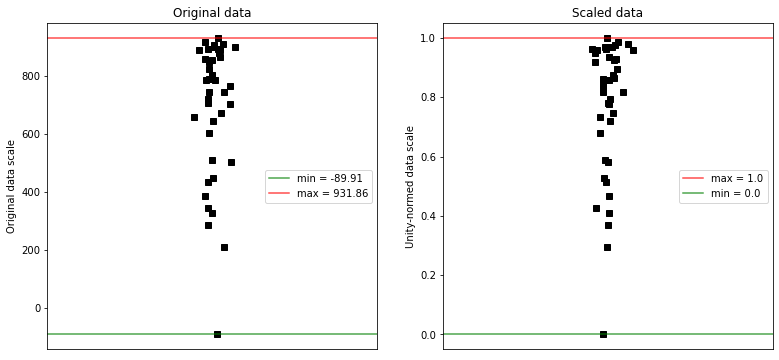

In [100]:
## create some data

N = 42
data = np.log(np.random.rand(N)) * 234 + 934

# get min and max
dataMin = min(data)
dataMax = max(data)

# now min-max scale
dataS = (data - dataMin) / (dataMax - dataMin)


# now plot
fig,ax = plt.subplots(1,2,figsize=(13,6))

ax[0].plot(1 + np.random.randn(N) / 20, data, 'ks')
ax[0].axhline(dataMin, color = 'g', alpha = 0.7, label = 'min = {}'.format(np.round(dataMin, 2)))
ax[0].axhline(dataMax, color = 'r', alpha = 0.7, label = 'max = {}'.format(np.round(dataMax, 2)))
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')
ax[0].legend()

ax[1].plot(1 + np.random.randn(N) /20 ,dataS,'ks')
ax[1].axhline(max(dataS), color = 'r', alpha = 0.7, label = 'max = {}'.format(max(dataS)))
ax[1].axhline(min(dataS), color = 'g', alpha = 0.7, label = 'min = {}'.format(min(dataS)))
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity-normed data scale')
ax[1].set_title('Scaled data')
ax[1].legend();

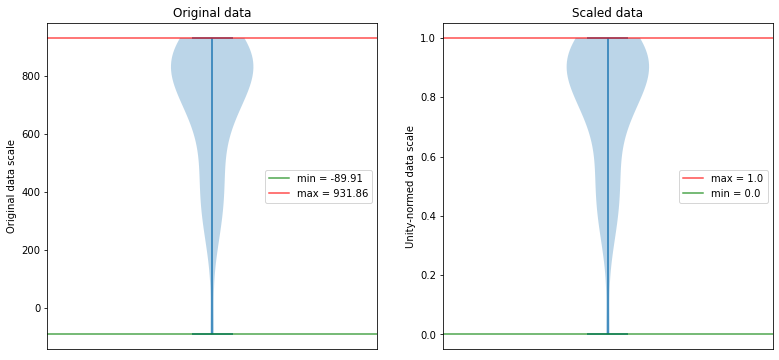

In [101]:
fig,ax = plt.subplots(1,2,figsize=(13,6))

ax[0].violinplot(data)
ax[0].axhline(dataMin, color = 'g', alpha = 0.7, label = 'min = {}'.format(np.round(dataMin, 2)))
ax[0].axhline(dataMax, color = 'r', alpha = 0.7, label = 'max = {}'.format(np.round(dataMax, 2)))
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')
ax[0].legend()


ax[1].violinplot(dataS)
ax[1].axhline(max(dataS), color = 'r', alpha = 0.7, label = 'max = {}'.format(max(dataS)))
ax[1].axhline(min(dataS), color = 'g', alpha = 0.7, label = 'min = {}'.format(min(dataS)))
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity-normed data scale')
ax[1].set_title('Scaled data')
ax[1].legend();

In [102]:
cols = X_train.columns

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()

In [105]:
X_train = scaler.fit_transform(X_train)

In [106]:
X_test = scaler.transform(X_test)

In [108]:
X_train;

In [109]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [110]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [111]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.499828,0.503433,0.256766,0.517283,0.511112,0.517827,0.375525,0.457641,0.620981,0.515095,...,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483,0.221012
std,0.173567,0.173422,0.406738,0.291172,0.339296,0.203068,0.230653,0.208353,0.229045,0.205307,...,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378,0.414930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.375000,0.000000,0.375000,0.375000,0.375000,0.189189,0.320988,0.475610,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494565,0.487745,0.000000,0.517857,0.525000,0.508333,0.351351,0.469136,0.634146,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.625000,0.625000,0.400000,0.625000,0.625000,0.625000,0.513514,0.592593,0.792683,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

In [112]:
y_train.isnull().sum()

0

## Model training

In [113]:
# instantiate the model
cls = LogisticRegression(max_iter = 1000)

In [114]:
# fit the model
cls.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predict results

In [1]:
y_pred_test = cls.predict(X_test)

y_pred_test

NameError: name 'cls' is not defined

### predict_proba method


**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability of no rain` and `1 is for probability of rain.`

In [116]:
# probability of getting output as 0 - no rain

cls.predict_proba(X_test)

array([[0.91892792, 0.08107208],
       [0.83140679, 0.16859321],
       [0.84743106, 0.15256894],
       ...,
       [0.97920969, 0.02079031],
       [0.81212902, 0.18787098],
       [0.37188546, 0.62811454]])

In [118]:
cls.score(X_test, y_test)

0.8504518442983228

## Check accuracy score

In [119]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8505


In [120]:
(y_test == y_pred_test).mean()

0.8504518442983228

Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [121]:
y_pred_train = cls.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [122]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8477


### Check for overfitting and underfitting

In [123]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(cls.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(cls.score(X_test, y_test)))

Training set score: 0.8477
Test set score: 0.8505


### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [124]:
# check class distribution in test set
y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.

In [125]:
# check null accuracy score
null_accuracy = (22067 / (22067 + 6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


We can see that our model accuracy score is 0.8505 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

In [126]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[20862,  1205],
       [ 3048,  3324]], dtype=int64)

The confusion matrix shows `20892 + 3285 = 24177 correct predictions` and `3087 + 1175 = 4262 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20892


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3285


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1175 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3087 `(Type II error)`

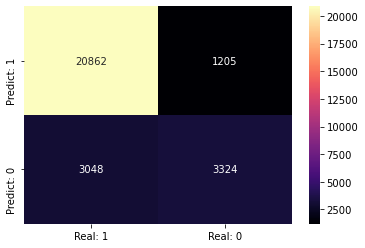

In [127]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data = cm, columns=['Real: 1', 'Real: 0'], 
                                 index=['Predict: 1', 'Predict: 0'])

sns.heatmap(cm_matrix, annot =True, cmap='magma', fmt='d');

### Classification Report


In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.73      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



### Classification accuracy

In [130]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [131]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8505


### Classification error

In [132]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1495


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.


In [133]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9454


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.

In [134]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8725


## k-Fold Cross Validation

In [135]:
 from sklearn.model_selection import cross_val_score

In [136]:
scores = cross_val_score(cls, X_train, y_train, cv = 5, scoring = 'accuracy')

In [138]:
scores.mean()

0.8469064908630994

In [144]:
cls.coef_[0]

array([ 8.43813278e-01, -2.62607672e+00,  5.90827664e-01,  9.53730447e-02,
       -9.14106096e-01,  3.52286586e+00, -1.73790027e-01, -9.19628197e-01,
        3.67888468e-01,  5.88846853e+00,  4.53160717e+00, -6.52965905e+00,
        1.03517443e-01,  9.08135518e-01,  1.12644469e+00,  1.20552645e+00,
        1.61312120e-01,  1.18178380e-01, -4.64747930e-02, -6.14765156e-01,
       -3.33766008e-02, -6.01805435e-01, -2.75141497e-01, -8.55757148e-01,
       -3.38355755e-01, -1.04518248e-01, -6.47504662e-01, -3.59166231e-01,
       -1.86028201e-01, -5.20890305e-01, -4.42353575e-01, -1.09030922e+00,
       -8.29294721e-01, -1.01789829e+00, -9.73152633e-01, -7.54132901e-01,
       -5.43171944e-01, -9.88424417e-01, -4.93763367e-01, -3.87369543e-01,
       -5.04169798e-01, -1.51397056e+00, -6.11358078e-01, -5.57128891e-01,
       -1.04531632e+00, -1.08917345e+00, -5.94362308e-01, -1.44660934e-01,
        4.72988544e-03,  7.91120768e-02, -1.48245251e-01, -5.21478892e-01,
       -3.14394692e-01, -

In [143]:
cls.intercept_

array([-5.9023381])